In [17]:
import MLMarker_app
import pandas as pd
import numpy as np
from MLMarker_app import MLMarker
import matplotlib.pyplot as plt
import random

In [18]:
df = pd.read_csv('./matrix 118 Lyophil.txt', sep='\t')
df.head(6)

,Intensity Lyop_1,Intensity Lyop_2,Intensity Lyop_3,Intensity Lyop_4,C: Only identified by site,C: Reverse,C: Potential contaminant,C: GOBP slim name,C: GOCC slim name,C: KEGG name,...,N: Sequence coverage [%],N: Unique + razor sequence coverage [%],N: Unique sequence coverage [%],N: Mol. weight [kDa],N: Q-value,N: Score,N: Intensity,N: MS/MS count,T: Protein IDs,T: Majority protein IDs
0,"24,2713",NaN,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,...,"20,6","16,9","6,6","53,5",0,"87,787",20248000,7,sp|O43790|KRT86_HUMAN;CON__O43790;sp|Q14533|KR...,sp|O43790|KRT86_HUMAN;CON__O43790;sp|Q14533|KR...
1,"23,5608",NaN,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,...,"13,5",12,"10,5","52,247",0,"44,34",12374000,5,sp|O76013|KRT36_HUMAN;CON__O76013;CON__A2AB72;...,sp|O76013|KRT36_HUMAN;CON__O76013
2,"32,2637","32,4781","32,5032","32,3472",NaN,NaN,+,NaN,NaN,NaN,...,"54,5","54,5","54,5","24,409",0,"280,94",22690000000,97,CON__P00761,CON__P00761
3,"26,6488","27,9057","26,3296","27,5407",NaN,NaN,+,NaN,NaN,NaN,...,"57,6","34,1","15,3","51,561",0,"323,31",636260000,49,sp|P02533|K1C14_HUMAN;CON__P02533;CON__A2A4G1;...,sp|P02533|K1C14_HUMAN;CON__P02533
4,"20,414","22,688","20,3743","23,696",NaN,NaN,+,NaN,NaN,NaN,...,"19,3","4,2","4,2","57,769",0,"34,085",23104000,10,CON__P02535-1;sp|Q2M2I5|K1C24_HUMAN;CON__Q2M2I5,CON__P02535-1
5,"22,4475","24,9214","22,2023","25,2201",NaN,NaN,+,NaN,NaN,NaN,...,"52,5","1,8","1,8","60,044",0,"6,7906",81407000,2,CON__P02538;sp|P02538|K2C6A_HUMAN;CON__Q8VED5,CON__P02538;sp|P02538|K2C6A_HUMAN


In [19]:
df['uniprot'] = df['T: Majority protein IDs'].astype(str).str.split(';').str[0]

df.loc[df['uniprot'].str.startswith('CON__'), 'uniprot'] = df.loc[df['uniprot'].str.startswith('CON__'), 'uniprot'].str.split('CON__').str[1]

df.loc[df['uniprot'].str.startswith('sp|'), 'uniprot'] = df.loc[df['uniprot'].str.startswith('sp|'), 'uniprot'].astype(str).str.split('|').str[1]
df['uniprot'] = df['uniprot'].astype(str).str.split('-').str[0]
sub_df = df[['uniprot', 'Intensity Lyop_1', 'Intensity Lyop_2', 'Intensity Lyop_3','Intensity Lyop_4']]
sub_df = sub_df.replace(',', '.', regex=True)
sub_df = sub_df.set_index('uniprot')
sub_df = sub_df.T
sub_df.fillna(0, inplace=True)
sub_df = sub_df.astype(float)
sub_df.iloc[:,:] = np.where(sub_df.iloc[:,:] > 0, 1, 0)

#sum the rows into one new row
sub_df_combined = sub_df.sum()


In [20]:
sub_df_combined = pd.DataFrame(sub_df_combined, columns=['uniprot']).T
sub_df_combined.iloc[:,:] = np.where(sub_df_combined.iloc[:,:] > 0, 1, 0)
sub_df_combined


uniprot,O43790,O76013,P00761,P02533,P02535,P02538,P02768,P02769,P04259,P05787,...,Q8N139,Q8WVV4,Q96DR8,Q96P63,Q96QA5,Q96QK1,Q9NZT1,Q9P0W8,Q9P273,Q9UN37
uniprot,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
test = MLMarker(sub_df_combined.iloc[0:1,:], binary = True)
prediction = MLMarker.predict_top_tissues(test)
prediction

Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


[('Pancreas', 0.1983),
 ('Monocytes', 0.1291),
 ('B-cells', 0.0845),
 ('Testis', 0.0593),
 ('Pituitary gland', 0.0396)]

In [22]:
shap_df = MLMarker.shap_values_df(test, n_preds=5).reset_index()
shap_df

,tissue,A0A075B6H7,A0A075B6I0,A0A075B6Q5,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,A0A0B4J1V0,A0A0B4J1V6,A0A0B4J1X8,...,Q9Y6U3,Q9Y6V0,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8
0,Pancreas,0.000002,0.000042,2.530137e-06,0.000013,0.000004,1.390330e-07,0.000004,0.000000e+00,3.742977e-06,...,0.000015,0.000229,0.000139,0.000000e+00,0.000000,0.000000,1.000880e-06,0.0,0.0,0.0
1,Monocytes,0.000000,0.000053,2.774400e-05,0.000002,0.000002,5.965932e-07,0.000000,0.000000e+00,3.668685e-07,...,0.000005,0.000088,0.000000,0.000000e+00,0.000000,0.000017,0.000000e+00,0.0,0.0,0.0
2,B-cells,0.000000,0.000012,2.121185e-05,0.000000,0.000002,0.000000e+00,0.000002,0.000000e+00,0.000000e+00,...,0.000001,0.000164,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0
3,Testis,0.000000,0.000016,4.015321e-06,0.000011,0.000003,3.356480e-06,-0.000001,2.006309e-07,3.260859e-06,...,0.000005,0.000008,0.000008,6.043326e-07,0.000017,0.000000,3.260984e-07,0.0,0.0,0.0
4,Pituitary gland,0.000000,0.000017,9.088094e-07,0.000001,0.000004,4.531245e-06,0.000002,0.000000e+00,2.822066e-07,...,0.000005,-0.000958,0.000002,0.000000e+00,0.000000,0.000000,1.476024e-06,0.0,0.0,0.0


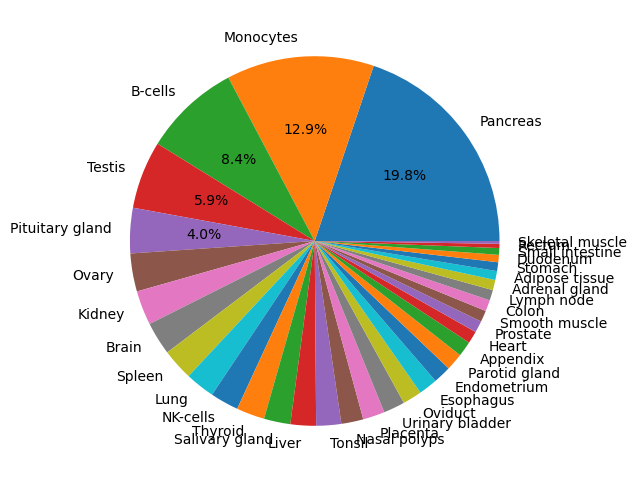

In [23]:
MLMarker.pie_chart_predictions(test)

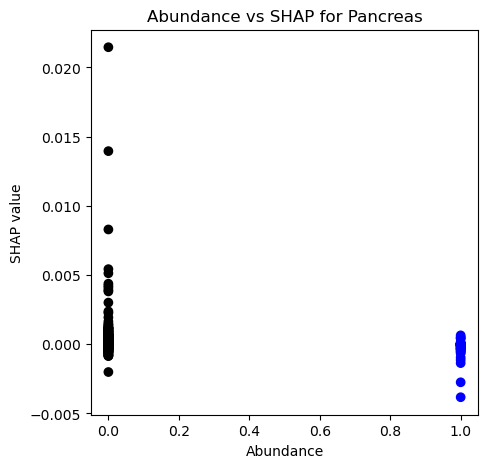

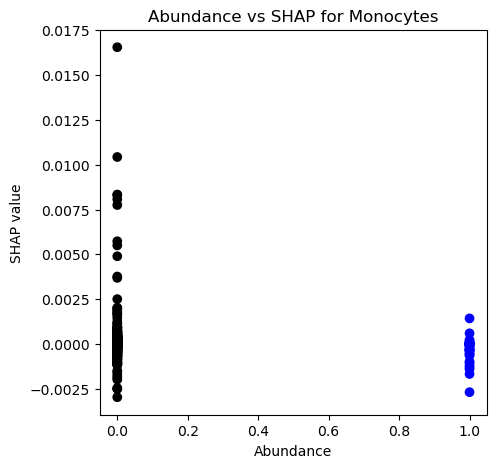

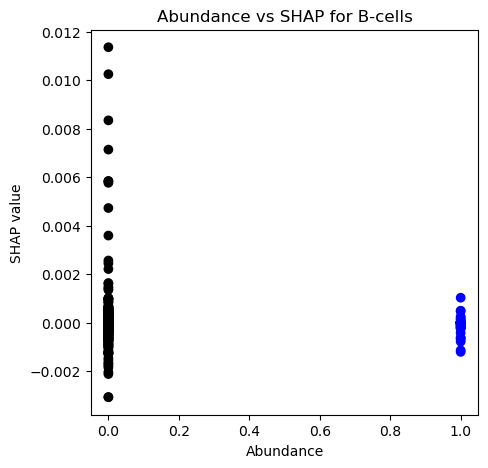

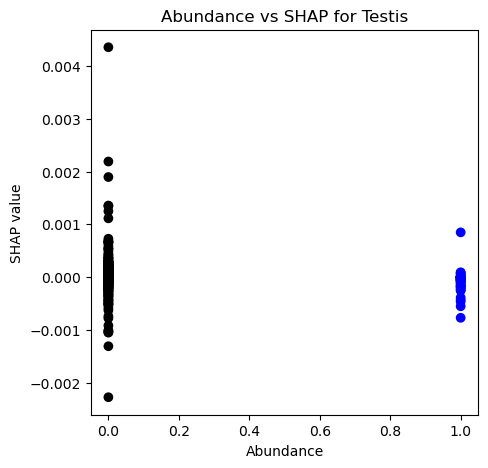

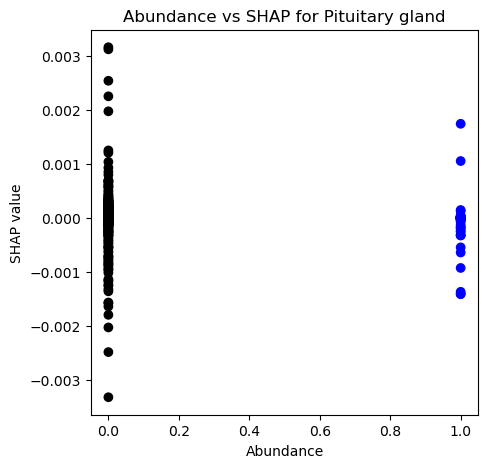

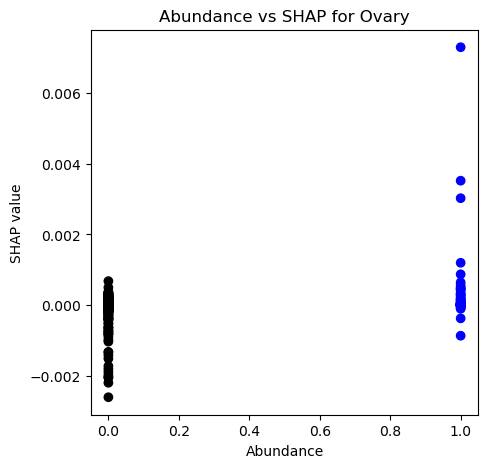

In [24]:
MLMarker.shap_abundance_distribution(test, n_preds=6)

The base value is 0.02857142857142838
Pancreas


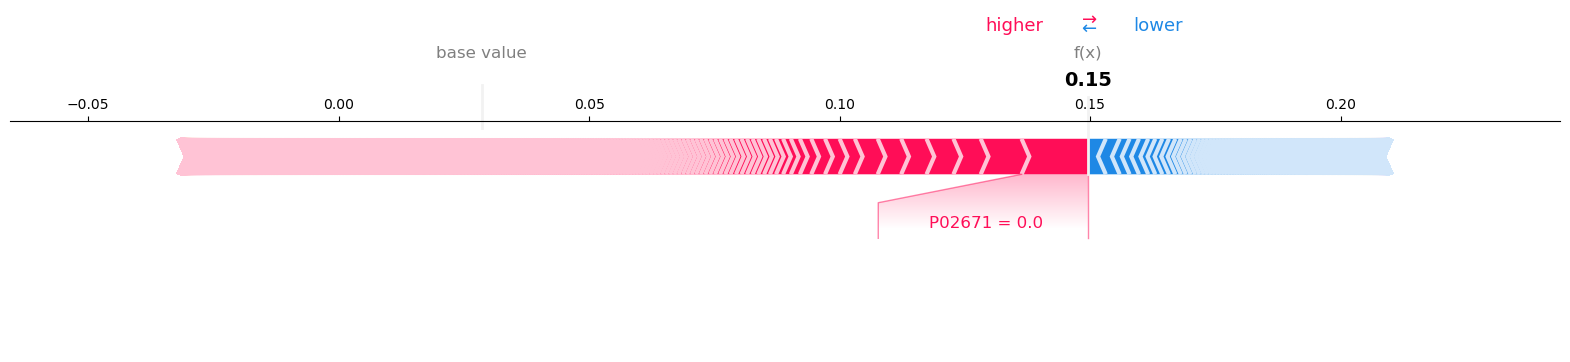

None

Monocytes


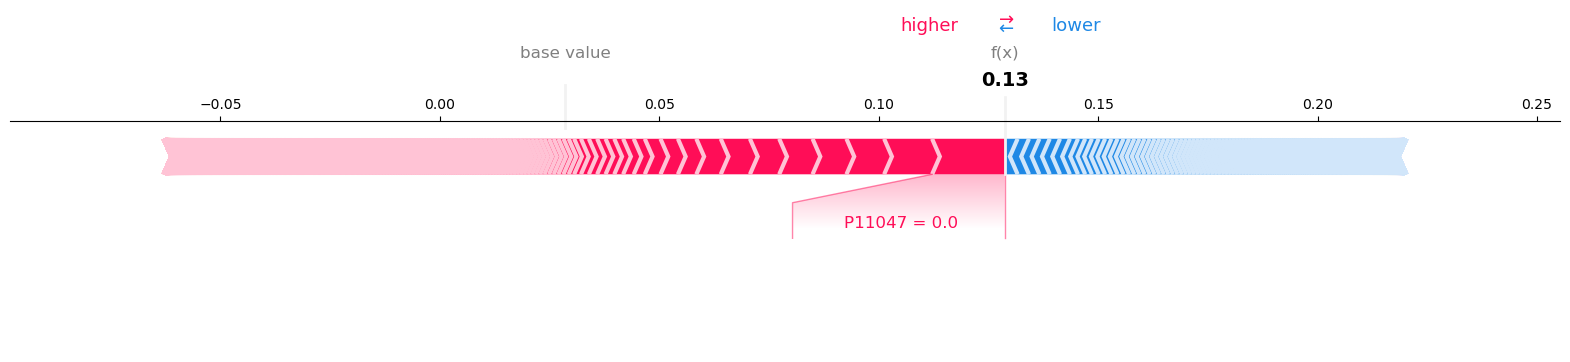

None

B-cells


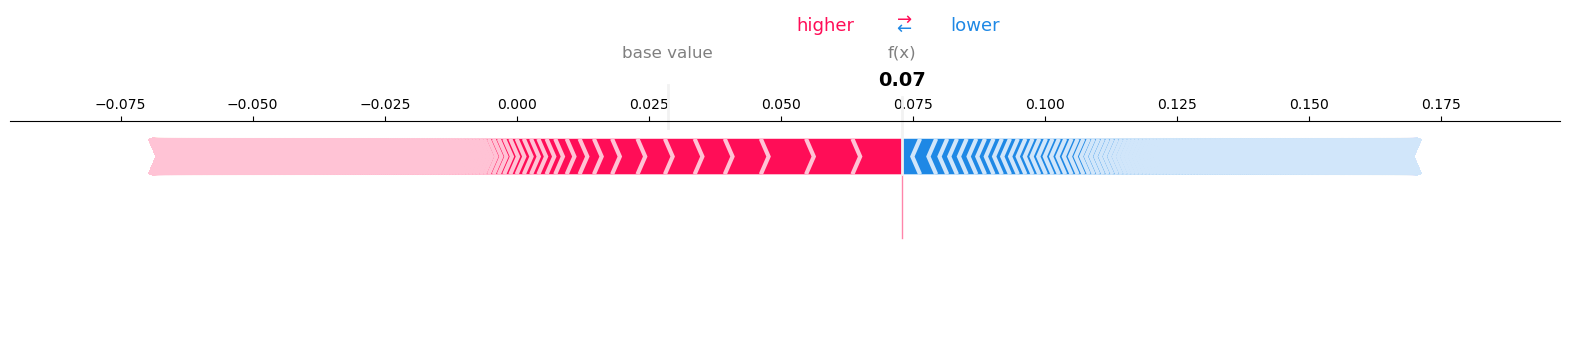

None

Testis


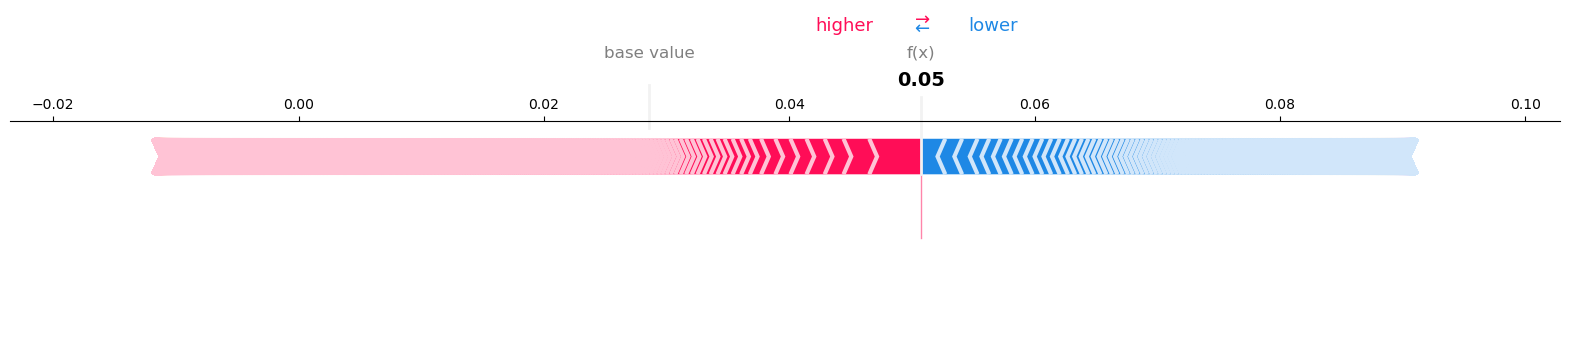

None

Salivary gland


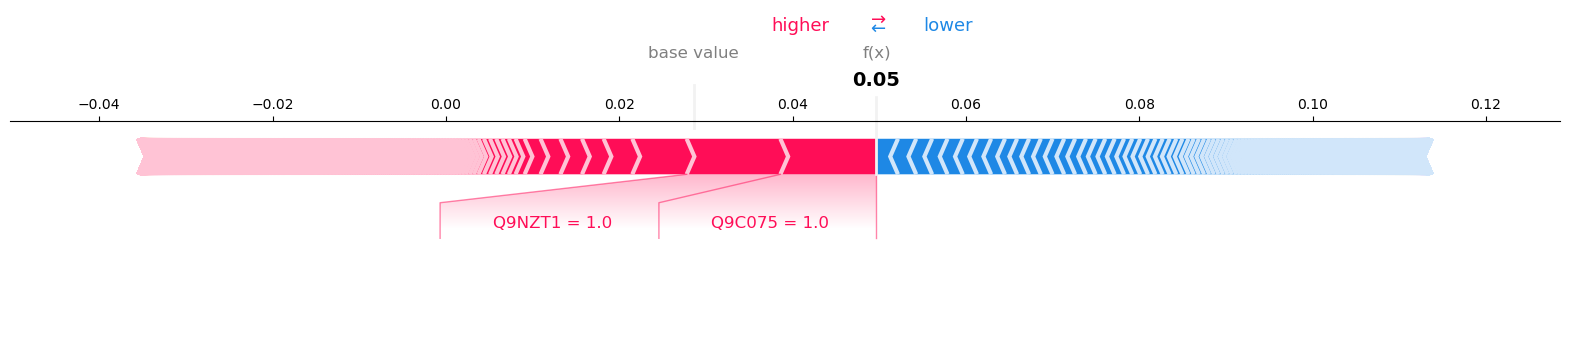

None

In [14]:
MLMarker.visualize_shap_force_plot(test, n_preds=5) 

In [25]:
shap_df = MLMarker.shap_values_df(test, n_preds=10) 

In [26]:
shap_df_filt = shap_df.filter(items=sub_df_combined.columns.tolist())
shap_df_filt


,O76013,P02533,P02538,P05787,P08727,P08779,P13645,P13647,P19013,P20930,...,Q08554,Q14574,Q6UWP8,Q8IVM0,Q8N139,Q8WVV4,Q96QK1,Q9NZT1,Q9P273,Q9UN37
tissue,,,,,,,,,,,,,,,,,,,,,
Pancreas,0.0,-0.000019,-0.000336,0.000516,0.000422,0.000006,-6.347023e-07,-0.003831,-0.000419,0.000639,...,-1.379651e-05,-0.000166,-0.000529,0.0,-0.000090,-0.000580,0.000000e+00,-0.001146,-0.000259,0.0
Monocytes,0.0,-0.000009,-0.000304,-0.001195,-0.000390,0.000000,0.000000e+00,-0.002686,-0.000260,-0.001671,...,-9.778935e-06,-0.000013,-0.000340,0.0,-0.000019,-0.000379,0.000000e+00,-0.001401,-0.000586,0.0
B-cells,0.0,-0.000002,0.001035,-0.000774,-0.000147,-0.000017,0.000000e+00,-0.001133,-0.000109,-0.000686,...,-1.378716e-06,0.000000,-0.000197,0.0,-0.000090,-0.000120,0.000000e+00,-0.000617,-0.000186,0.0
Testis,0.0,-0.000027,-0.000248,0.000090,-0.000098,-0.000056,-4.588477e-07,0.000847,-0.000466,0.000084,...,-1.753903e-05,-0.000065,-0.000388,0.0,0.000002,-0.000226,0.000000e+00,-0.000074,-0.000092,0.0
Pituitary gland,0.0,-0.000078,-0.000251,0.000145,-0.000188,-0.000014,-8.299953e-07,-0.001372,-0.000319,-0.001415,...,-6.368203e-06,-0.000014,-0.000197,0.0,-0.000046,0.000046,-3.460534e-06,-0.001412,0.001743,0.0
Ovary,0.0,0.000072,0.001197,0.000165,0.000173,0.000420,-1.497947e-06,0.000255,-0.000106,0.003027,...,6.408198e-04,0.000206,0.000439,0.0,-0.000060,0.000557,1.943531e-07,0.007305,-0.000378,0.0
Kidney,0.0,-0.000033,-0.000047,0.000100,0.000030,-0.000019,0.000000e+00,-0.001025,-0.000109,0.000805,...,-1.948274e-06,-0.000010,-0.000075,0.0,-0.000146,-0.000219,0.000000e+00,-0.000425,-0.000101,0.0
Brain,0.0,-0.000061,-0.000176,-0.000306,-0.000246,0.000009,0.000000e+00,-0.001224,-0.000132,-0.000584,...,-4.612311e-07,-0.000017,-0.000002,0.0,-0.000045,-0.000252,0.000000e+00,-0.000813,0.000048,0.0
Spleen,0.0,-0.000077,-0.000412,-0.000339,-0.000500,-0.000047,0.000000e+00,-0.001377,-0.000481,-0.001359,...,-5.161994e-05,-0.000083,-0.000219,0.0,-0.000092,-0.000349,4.159729e-07,-0.001725,-0.000233,0.0


In [27]:
shap_df_t = shap_df_filt.T

In [32]:
row_sum = shap_df.sum(axis=1)
row_sum['Monocytes']
prediction = MLMarker.predict_top_tissues(test, n_preds=10)
comparison = pd.DataFrame(columns=['Tissue', 'Present', 'Absent', 'Ratio', 'Probability', 'Metric', ' SHAP sum', 'SHAP_sum - base value' ,'Metric_SHAP'])
row_sum = shap_df.sum(axis=1)
base_value = 0.028
for i in shap_df_t.columns:
    prob = [tup[1] for tup in prediction if tup[0] == i][0]
    present = len(shap_df_t[shap_df_t[i]>0].index)
    absent = (shap_df.loc[i] > 0).sum() - present
    ratio = present/(present+absent)
    metric = ratio*prob*100
    shap_sum = row_sum[i] 
    shap_sum_base = shap_sum - base_value
    if shap_sum < 0:
        shap_sum = 0
    metric_shap = metric * shap_sum *100
    comparison.loc[i] = [i, present, absent, ratio, prob*100, metric, shap_sum,  shap_sum_base, metric_shap]

In [33]:
comparison

,Tissue,Present,Absent,Ratio,Probability,Metric,SHAP sum,SHAP_sum - base value,Metric_SHAP
Pancreas,Pancreas,11,1831,0.005972,19.83,0.118420,0.169726,0.141726,2.009893
Monocytes,Monocytes,8,971,0.008172,12.91,0.105495,0.100508,0.072508,1.060309
B-cells,B-cells,9,1021,0.008738,8.45,0.073835,0.055893,0.027893,0.412682
Testis,Testis,11,1867,0.005857,5.93,0.034734,0.030738,0.002738,0.106765
Pituitary gland,Pituitary gland,12,1505,0.007910,3.96,0.031325,0.011067,-0.016933,0.034666
Ovary,Ovary,38,1671,0.022235,3.32,0.073821,0.004669,-0.023331,0.034469
Kidney,Kidney,19,1299,0.014416,3.01,0.043392,0.001541,-0.026459,0.006685
Brain,Brain,11,1449,0.007534,2.88,0.021699,0.000261,-0.027739,0.000565
Spleen,Spleen,11,1462,0.007468,2.75,0.020536,0.000000,-0.029054,0.000000
Lung,Lung,28,1778,0.015504,2.58,0.040000,0.000000,-0.030777,0.000000


In [ ]:
comparison

,Tissue,Present,Absent,Ratio,Probability,Metric,SHAP_sum,Metric_SHAP
Pancreas,Pancreas,11,1831,0.005972,19.83,0.030115,0.141726,0.426804
Monocytes,Monocytes,8,971,0.008172,12.91,0.063297,0.072508,0.458949
B-cells,B-cells,9,1021,0.008738,8.45,0.103407,0.027893,0.288427
Testis,Testis,11,1867,0.005857,5.93,0.098774,0.002738,0.027046
Pituitary gland,Pituitary gland,12,1505,0.007910,3.96,0.199756,0.000000,0.000000
Ovary,Ovary,38,1671,0.022235,3.32,0.669736,0.000000,0.000000
Kidney,Kidney,19,1299,0.014416,3.01,0.478930,0.000000,0.000000
Brain,Brain,11,1449,0.007534,2.88,0.261606,0.000000,0.000000
Spleen,Spleen,11,1462,0.007468,2.75,0.271555,0.000000,0.000000
Lung,Lung,28,1778,0.015504,2.58,0.600925,0.000000,0.000000


In [194]:
comparison = pd.DataFrame(columns=['Tissue', 'Present', 'Absent'])
for i in shap_df_t.columns:
    present = len(shap_df_t[shap_df_t[i]>0].index)
    absent = (shap_df.loc[i] > 0).sum() - present
    comparison.loc[i] = [i, present, absent]

In [195]:
comparison

,Tissue,Present,Absent
Pancreas,Pancreas,0,1842
Monocytes,Monocytes,0,979
B-cells,B-cells,0,1030
Testis,Testis,0,1878
Pituitary gland,Pituitary gland,0,1517
Ovary,Ovary,0,1709
Kidney,Kidney,0,1318
Brain,Brain,0,1460
Spleen,Spleen,0,1473
Lung,Lung,0,1806


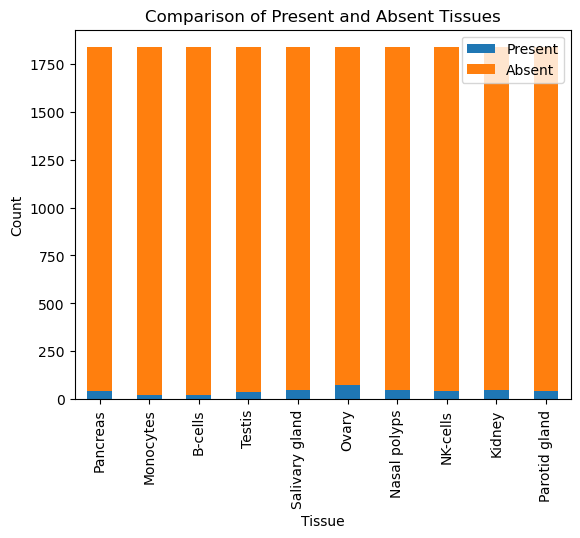

In [174]:
comparison.plot.bar(x='Tissue', y=['Present', 'Absent'], stacked=True)
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.title('Comparison of Present and Absent Tissues')
plt.legend(['Present', 'Absent'])
plt.show()
